In [1]:
# Application initialization
import mercury as mr

import warnings

warnings.filterwarnings("ignore")

show_code = mr.Checkbox(value=False, label="Show code", url_key="show_code")

app = mr.App(
    title="cGAN Forecasts Visualization",
    description="Visualizing cGAN Forecasts",
    show_code=show_code.value,
)

mercury.Checkbox

mercury.App

In [2]:
from os import getenv
from datetime import datetime
from cgan_ui.utils import get_forecast_data_dates

# from cgan_ui.utils import  print_forecast_info

mask_region = getenv("DEFAULT_MASK", "East Africa")

data_dates = get_forecast_data_dates(source="cgan", mask_region=mask_region)

cgan_date = mr.Select(
    choices=data_dates,
    value=data_dates[0],
    label="Forecast Initialization Date",
    url_key="cgan_date",
)

# print_forecast_info(datetime.strptime(cgan_date.value.lower(), "%b %d, %Y"))

mercury.Select

In [3]:
from cgan_ui.utils import get_data_store_path
from cgan_ui.show_cgan import load_GAN_forecast

store_path = get_data_store_path(source="cgan", mask_region=mask_region)

# Load the GAN forecast
data = load_GAN_forecast(
    forecast_init_date=datetime.strptime(cgan_date.value.lower(), "%b %d, %Y"),
    data_dir=store_path,
    mask_region=mask_region,
)

In [4]:
from cgan_ui.constants import ACCUMULATION_TIME

accumulation_time = mr.Select(
    value=ACCUMULATION_TIME[0],
    choices=ACCUMULATION_TIME,
    label="Accumulation Time",
    url_key="accumulation_time",
)

mercury.Select

In [5]:
from cgan_ui.constants import ACCUMULATION_UNITS

if accumulation_time.value == "6h":
    acc_unit = "mm/6h"
elif accumulation_time.value == "24h":
    acc_unit = "mm/day"
else:
    acc_unit = ACCUMULATION_UNITS[0]

accumulation_units = mr.Select(
    value=acc_unit,
    choices=ACCUMULATION_UNITS,
    label="Accumulation Units",
    url_key="accumulation_units",
)

mercury.Select

In [6]:
from cgan_ui.constants import VALID_TIME_START_HOUR

valid_start_hour = mr.Select(
    value=VALID_TIME_START_HOUR[-1],
    choices=VALID_TIME_START_HOUR,
    label=f"Valid Time Start Hour in {getenv('DEFAULT_TIMEZONE','EAT')}",
    url_key="valid_stat_hour",
)

mercury.Select

In [7]:
from cgan_ui.constants import COUNTRY_NAMES

mask_area = mr.Select(
    choices=COUNTRY_NAMES,
    value=COUNTRY_NAMES[0],
    label="Area of Interest",
    url_key="mask_area",
)

mercury.Select

In [8]:
from cgan_ui.constants import COLOR_SCHEMES

color_style = mr.Select(
    choices=COLOR_SCHEMES,
    value=COLOR_SCHEMES[0],
    label="Visualization Color Style",
    url_key="color_style",
)

mercury.Select

mercury.Text

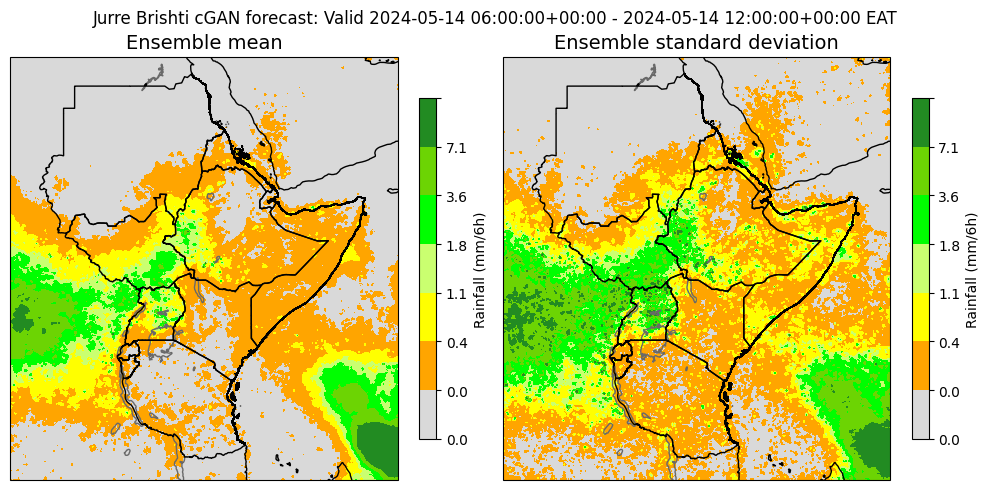

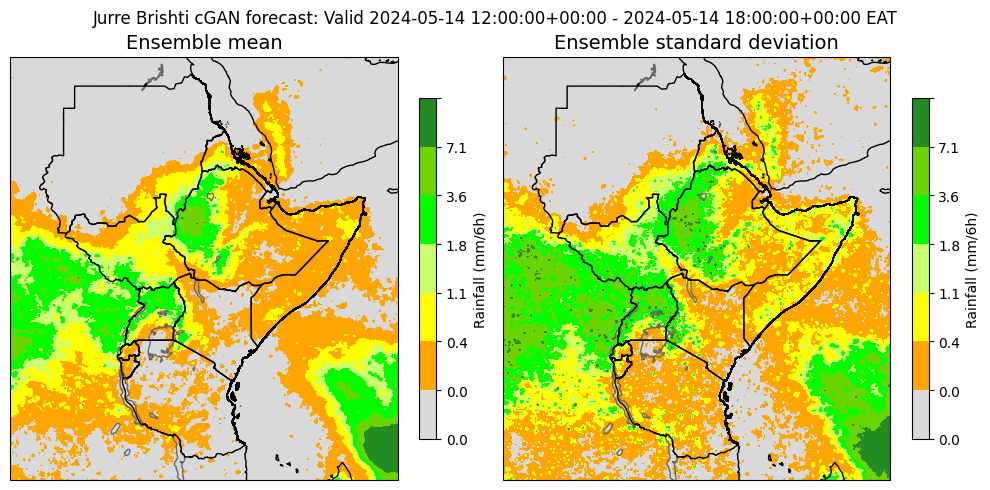

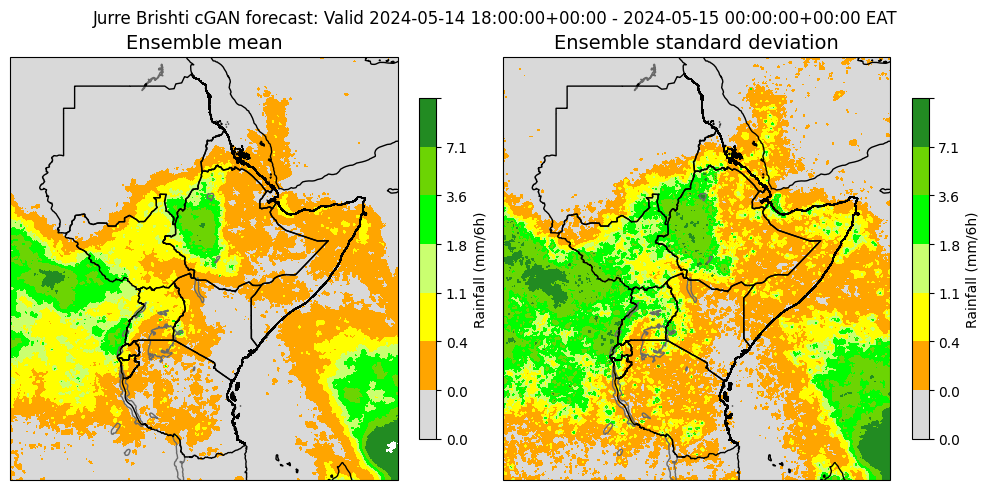

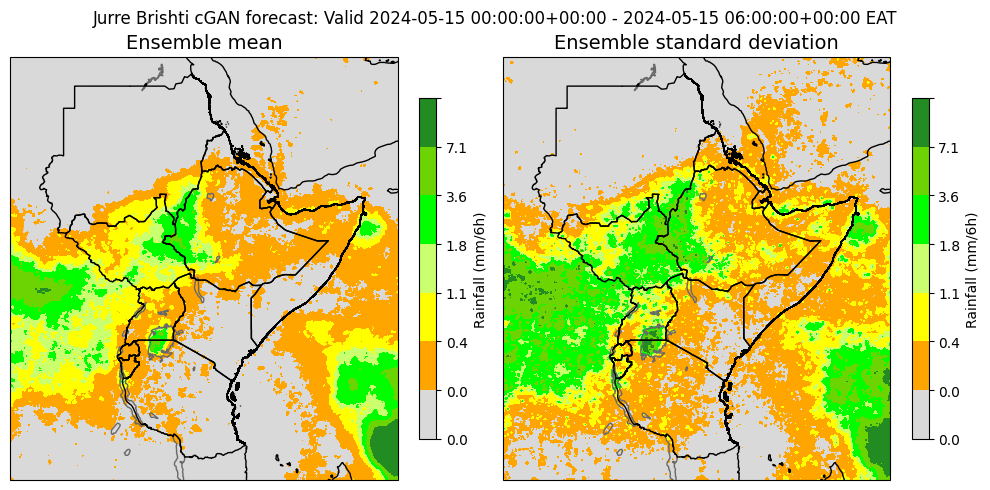

In [9]:
from cgan_ui.show_cgan import plot_GAN_forecast

# forecast_filename = mr.Text(
#     value="",
#     label="File Name For cGAN Forecast Map",
#     rows=1,
#     url_key="forecast_filename",
# )

# Plot the GAN forecast
plot_GAN_forecast(
    data,
    valid_time_start_hour=valid_start_hour.value,
    accumulation_time=accumulation_time.value,
    style=None if color_style.value == "Default" else color_style.value,
    region=mask_area.value,
    plot_units=accumulation_units.value,
    # file_name=None if forecast_filename.value == "" else forecast_filename.value,
)

In [10]:
from cgan_ui.show_cgan import plot_GAN_threshold_chance

show_exceedence = mr.Checkbox(
    value=False,
    label="Theshold Exceedence Maps",
    url_key="show_exceedence_plots",
)


if show_exceedence.value:
    show_percentage = mr.Checkbox(
        value=False,
        label="Show Exceedence Percentages",
        url_key="show_exceedence_percentages",
    )
    exceedence = mr.Numeric(
        value=5,
        min=0,
        max=100,
        label="Precipitation Exceedence Threshold",
        step=1,
        url_key="exceedence_threshold",
    )
    # thresh_filename = mr.Text(
    #     value="",
    #     label="File Name For Threshold Exceedence Map",
    #     rows=1,
    #     url_key="theshold_filename",
    # )
    # Plot the chance of rainfall at a rate above a specified threshold.
    #   threshold=2             - We'll plot the chance of rainfall above this threshold rate. The
    #                             default is 2 mm/h. The units of threshold is set by plot_units.
    #   plot_units='mm/h'       - Can be 'mm/h' (default), 'mm/6h', 'mm/day' or 'mm/week'
    #   valid_time_start_hour=6 - The hour the valid time starts at. Can either be 6, 12, 18 or 0 UTC or 'all'.
    # add numeric widget
    plot_GAN_threshold_chance(
        data,
        threshold=exceedence.value,
        plot_units=accumulation_units.value,
        valid_time_start_hour=valid_start_hour.value,
        show_percentages=show_percentage.value,
        region=mask_area.value,
        # file_name=None if thresh_filename.value == "" else thresh_filename.value,
    )

mercury.Checkbox

In [11]:
from cgan_ui.show_cgan import plot_GAN_local_histograms
from cgan_ui.data_utils import get_locations_data

show_histogram = mr.Checkbox(
    value=False,
    label="Visualize Locations Histogram",
    url_key="show_histogram",
)

if show_histogram.value:
    locations = get_locations_data(mask_area.value)
    location_picker = mr.Select(
        choices=[location["name"] for location in locations],
        value=locations[0]["name"],
        label="Select Location For Histogram Plot",
        url_key="hist_location",
    )
    # hist_filename = mr.Text(
    #     value="",
    #     label="File Name For Histogram Plots",
    #     rows=1,
    #     url_key="histogram_filename",
    # )
    # The location name can be selected from the list returned by print_locations()
    # All locations are listed in the file show_forecasts/shapes/locations.py
    #   For the case of the same name in different countries, the country can optionally
    #   be selected from 'Kenya', 'South Sudan', 'Rwanda', 'Burundi', 'Djibouti',
    #   'Eritrea', 'Ethiopia', 'Sudan', 'Somalia', 'Tanzania', 'Uganda'.
    # Be carefull. Sometimes there are a few places with the same name.
    plot_GAN_local_histograms(
        data,
        location_picker.value,
        country=mask_area.value,
        plot_units="mm/6h",
        # file_name=None if hist_filename.value == "" else hist_filename.value,
    )

mercury.Checkbox

In [12]:
from cgan_ui.show_cgan import plot_GAN_ensemble

show_ensemble = mr.Checkbox(
    value=False,
    label="Visualize Ensemble Members",
    url_key="show_ensemble",
)

if show_ensemble.value:
    ens_valid_start_hour = mr.Select(
        value=VALID_TIME_START_HOUR[1],
        choices=VALID_TIME_START_HOUR[:-1],
        label=f"Ensemble Valid Time Start Hour in {getenv('DEFAULT_TIMEZONE','EAT')}",
        url_key="valid_stat_hour",
    )
    # ensemble_filename = mr.Text(
    #     value="",
    #     label="File Name For Ensemble Plots",
    #     rows=1,
    #     url_key="ensemble_filename",
    # )
    # Plot the full ensemble
    plot_GAN_ensemble(
        data,
        valid_time_start_hour=ens_valid_start_hour.value,
        style=None if color_style.value == "Default" else color_style.value,
        plot_units=accumulation_units.value,
        region=mask_area.value,
        # file_name=None if ensemble_filename.value == "" else ensemble_filename.value
    )

mercury.Checkbox